In [5]:
import datasets

ds_fsdp1 = datasets.load_dataset("json", data_files="/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl", split="train")
ds_fsdp2 = datasets.load_dataset("json", data_files="/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl", split="train")

# !ls -al '/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2' 



Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 130 examples [00:00, 13584.28 examples/s]
Generating train split: 130 examples [00:00, 24451.10 examples/s]


/mnt/7TB-a/osilkin/training-frozen/.venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 130 examples [00:00, 10021.31 examples/s]
Generating train split: 130 examples [00:00, 22298.27 examples/s]


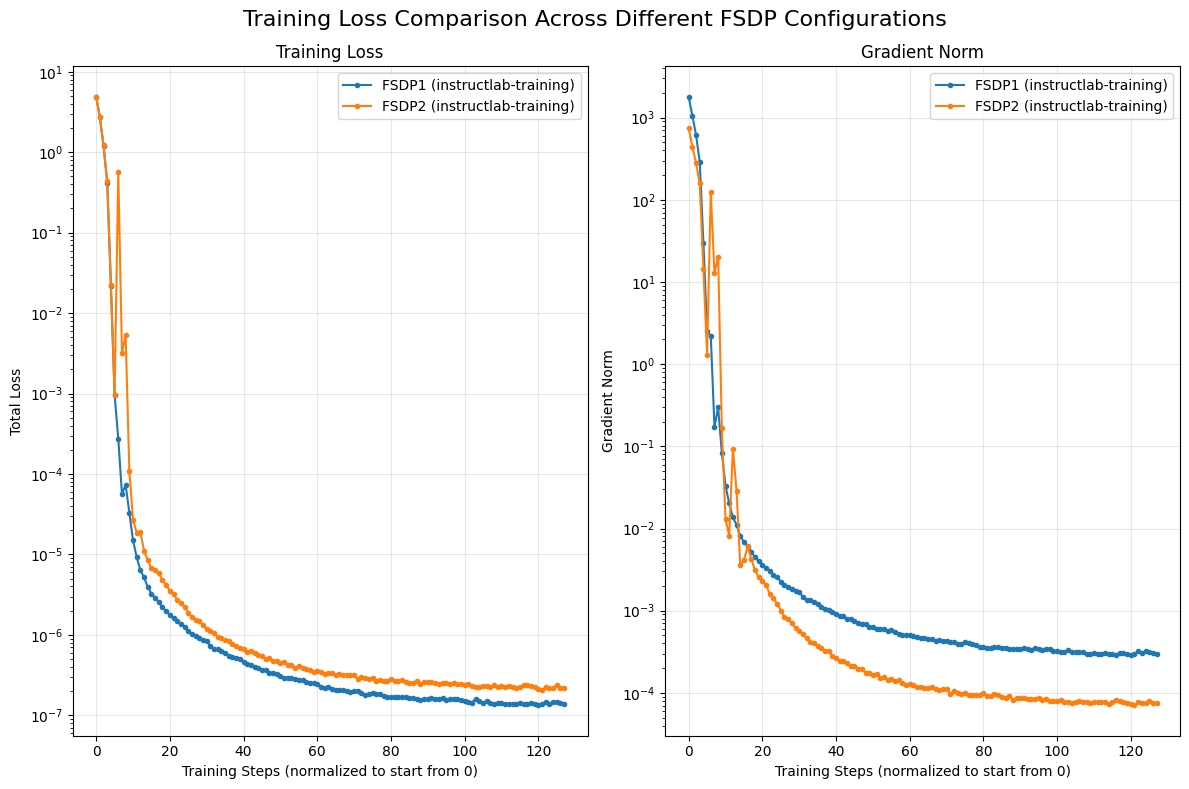


Dataset Statistics:
--------------------------------------------------
FSDP1 (instructlab-training) Loss: 128 valid values, first: 4.895228, last: 0.000000
FSDP1 (instructlab-training) GradNorm: 128 valid values, first: 1797.061646, last: 0.000297
FSDP2 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000000
FSDP2 (instructlab-training) GradNorm: 128 valid values, first: 741.628235, last: 0.000075


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datasets

def plot_training_losses(dataset_paths, dataset_names=None, title="Training Loss Comparison", 
                        figsize=(12, 8), use_log_scale=True, show_stats=True):
    """
    Plot training losses from multiple datasets for comparison.
    
    Args:
        dataset_paths: List of paths to JSONL files containing training metrics
        dataset_names: List of names for the datasets (optional, will use paths if not provided)
        title: Title for the plot
        figsize: Figure size tuple
        use_log_scale: Whether to use log scale for y-axis
        show_stats: Whether to print statistics for each dataset
    """
    # Load datasets
    datasets_info = []
    for i, path in enumerate(dataset_paths):
        ds = datasets.load_dataset("json", data_files=path, split="train")
        name = dataset_names[i] if dataset_names and i < len(dataset_names) else f"Dataset {i+1}"
        datasets_info.append((name, ds))
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    for name, dataset in datasets_info:
        total_loss = dataset['total_loss']
        gradnorm = dataset['gradnorm']
        
        # Find the first non-None index for loss
        first_valid_idx_loss = None
        for i, loss in enumerate(total_loss):
            if loss is not None:
                first_valid_idx_loss = i
                break
        
        # Find the first non-None index for gradnorm
        first_valid_idx_grad = None
        for i, grad in enumerate(gradnorm):
            if grad is not None:
                first_valid_idx_grad = i
                break
        
        # Plot loss
        if first_valid_idx_loss is not None:
            valid_losses = [loss for loss in total_loss[first_valid_idx_loss:] if loss is not None]
            x_values_loss = list(range(len(valid_losses)))
            ax1.plot(x_values_loss, valid_losses, label=name, marker='o', markersize=3)
        
        # Plot gradnorm
        if first_valid_idx_grad is not None:
            valid_gradnorms = [grad for grad in gradnorm[first_valid_idx_grad:] if grad is not None]
            x_values_grad = list(range(len(valid_gradnorms)))
            ax2.plot(x_values_grad, valid_gradnorms, label=name, marker='o', markersize=3)
    
    # Configure loss subplot
    ax1.set_xlabel('Training Steps (normalized to start from 0)')
    ax1.set_ylabel('Total Loss')
    ax1.set_title('Training Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    if use_log_scale:
        ax1.set_yscale('log')
    
    # Configure gradnorm subplot
    ax2.set_xlabel('Training Steps (normalized to start from 0)')
    ax2.set_ylabel('Gradient Norm')
    ax2.set_title('Gradient Norm')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    if use_log_scale:
        ax2.set_yscale('log')
    
    # Set overall title
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Print stats if requested
    if show_stats:
        print("\nDataset Statistics:")
        print("-" * 50)
        for name, dataset in datasets_info:
            total_loss = dataset['total_loss']
            gradnorm = dataset['gradnorm']
            valid_losses = [loss for loss in total_loss if loss is not None]
            valid_gradnorms = [grad for grad in gradnorm if grad is not None]
            if valid_losses:
                print(f"{name} Loss: {len(valid_losses)} valid values, "
                      f"first: {valid_losses[0]:.6f}, last: {valid_losses[-1]:.6f}")
            if valid_gradnorms:
                print(f"{name} GradNorm: {len(valid_gradnorms)} valid values, "
                      f"first: {valid_gradnorms[0]:.6f}, last: {valid_gradnorms[-1]:.6f}")

# Example usage - you can rerun this with different paths after each training run
dataset_paths = [
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl",
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl"
]

dataset_names = [
    "FSDP1 (instructlab-training)",
    "FSDP2 (instructlab-training)"
]

plot_training_losses(
    dataset_paths=dataset_paths,
    dataset_names=dataset_names,
    title="Training Loss Comparison Across Different FSDP Configurations"
)

Generating train split: 130 examples [00:00, 14173.63 examples/s]
Generating train split: 130 examples [00:00, 22327.49 examples/s]


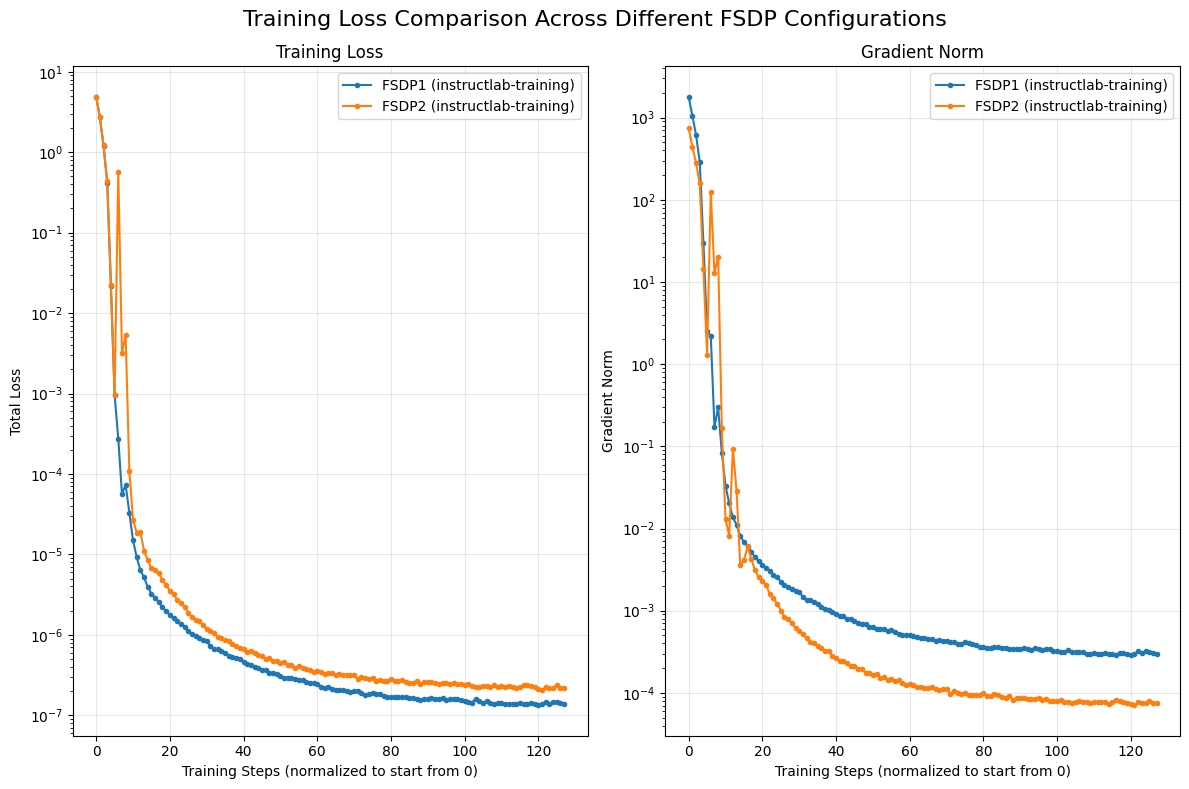


Dataset Statistics:
--------------------------------------------------
FSDP1 (instructlab-training) Loss: 128 valid values, first: 4.895228, last: 0.000000
FSDP1 (instructlab-training) GradNorm: 128 valid values, first: 1797.061646, last: 0.000297
FSDP2 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000000
FSDP2 (instructlab-training) GradNorm: 128 valid values, first: 741.628235, last: 0.000075


In [6]:


# Example usage - you can rerun this with different paths after each training run
dataset_paths = [
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl",
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl"
]

dataset_names = [
    "FSDP1 (instructlab-training)",
    "FSDP2 (instructlab-training)"
]

plot_training_losses(
    dataset_paths=dataset_paths,
    dataset_names=dataset_names,
    title="Training Loss Comparison Across Different FSDP Configurations"
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ds_fsdp1 = datasets.load_dataset("json", data_files="/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl", split="train")
ds_fsdp2 = datasets.load_dataset("json", data_files="/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl", split="train")

# Get the data for each dataset
datasets_info = [
    ('FSDP1 (instructlab-training)', ds_fsdp1),
    ('FSDP2 (instructlab-training)', ds_fsdp2),
    # ('FSDP1 instructlab (through Accelerate)', fsdp1_data), 
    # ('FSDP2 instructlab (through Accelerate)', fsdp2_accelerate_data),
    # ('FSDP2 (w/o Accelerate)', fsdp2_original_impl_data),
    # ('FSDP2 MiniTrainer', ds_mt),
    # ('FSDP2 MiniTrainer (original Aldo Settings)', ds_mt_orig),
]

plt.figure(figsize=(12, 8))

for name, dataset in datasets_info:
    total_loss = dataset['total_loss']
    
    # Find the first non-None index
    first_valid_idx = None
    for i, loss in enumerate(total_loss):
        if loss is not None:
            first_valid_idx = i
            break
    
    if first_valid_idx is not None:
        # Extract valid losses starting from first non-None
        valid_losses = [loss for loss in total_loss[first_valid_idx:] if loss is not None]
        # Create x-axis starting from 0 for comparison
        x_values = list(range(len(valid_losses)))
        
        plt.plot(x_values, valid_losses, label=name, marker='o', markersize=3)

plt.xlabel('Training Steps (normalized to start from 0)')
plt.ylabel('Total Loss')
plt.title('Training Loss Comparison Across Different FSDP Configurations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale since losses can vary significantly
plt.show()

# Print some stats
for name, dataset in datasets_info:
    total_loss = dataset['total_loss']
    valid_losses = [loss for loss in total_loss if loss is not None]
    if valid_losses:
        print(f"{name}: {len(valid_losses)} valid loss values, "
              f"first: {valid_losses[0]:.6f}, last: {valid_losses[-1]:.6f}")
# "])

In [ ]:


# Example usage - you can rerun this with different paths after each training run
dataset_paths = [
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl",
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl"
]

dataset_names = [
    "FSDP1 (instructlab-training)",
    "FSDP2 (instructlab-training)"
]

plot_training_losses(
    dataset_paths=dataset_paths,
    dataset_names=dataset_names,
    title="Training Loss Comparison Across Different FSDP Configurations"
)

Generating train split: 130 examples [00:00, 20317.45 examples/s]
Generating train split: 130 examples [00:00, 23718.28 examples/s]


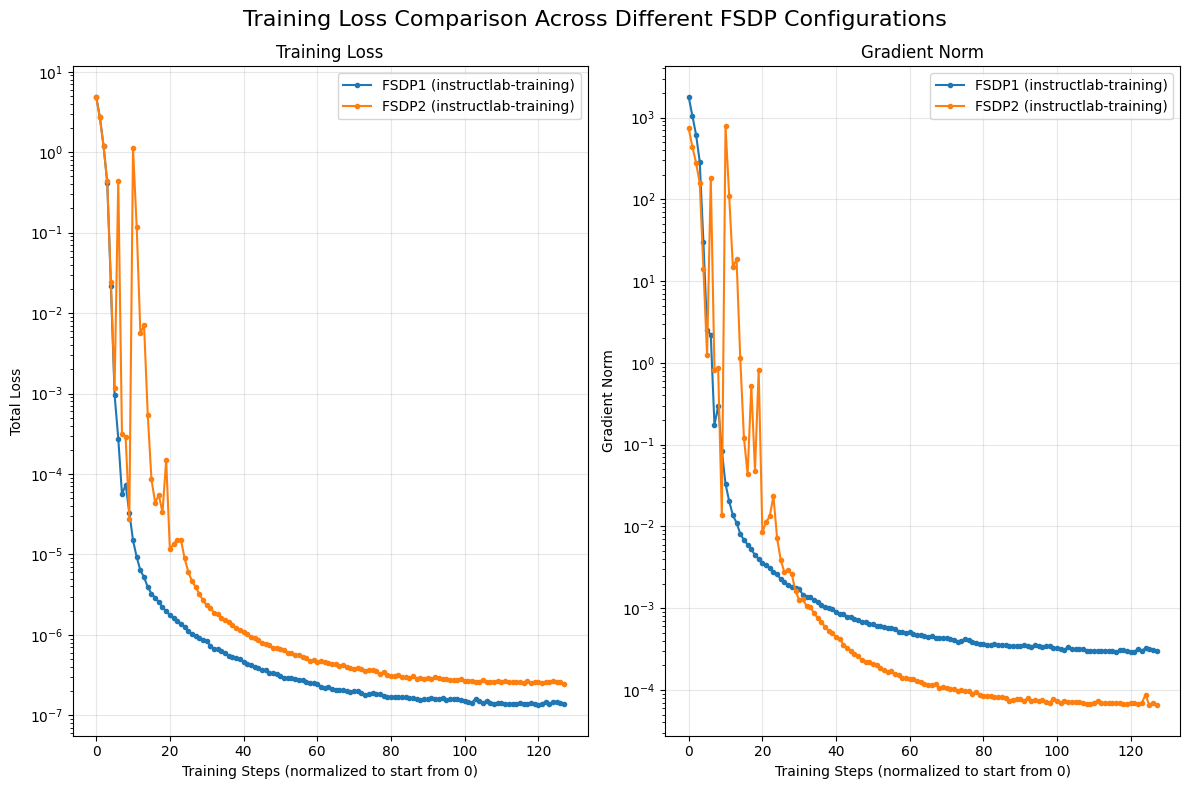


Dataset Statistics:
--------------------------------------------------
FSDP1 (instructlab-training) Loss: 128 valid values, first: 4.895228, last: 0.000000
FSDP1 (instructlab-training) GradNorm: 128 valid values, first: 1797.061646, last: 0.000297
FSDP2 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000000
FSDP2 (instructlab-training) GradNorm: 128 valid values, first: 741.622070, last: 0.000066


In [2]:


# Example usage - you can rerun this with different paths after each training run
dataset_paths = [
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl",
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl"
]

dataset_names = [
    "FSDP1 (instructlab-training)",
    "FSDP2 (instructlab-training)"
]

plot_training_losses(
    dataset_paths=dataset_paths,
    dataset_names=dataset_names,
    title="Training Loss Comparison Across Different FSDP Configurations"
)

Generating train split: 130 examples [00:00, 21736.48 examples/s]


Generating train split: 130 examples [00:00, 25164.28 examples/s]


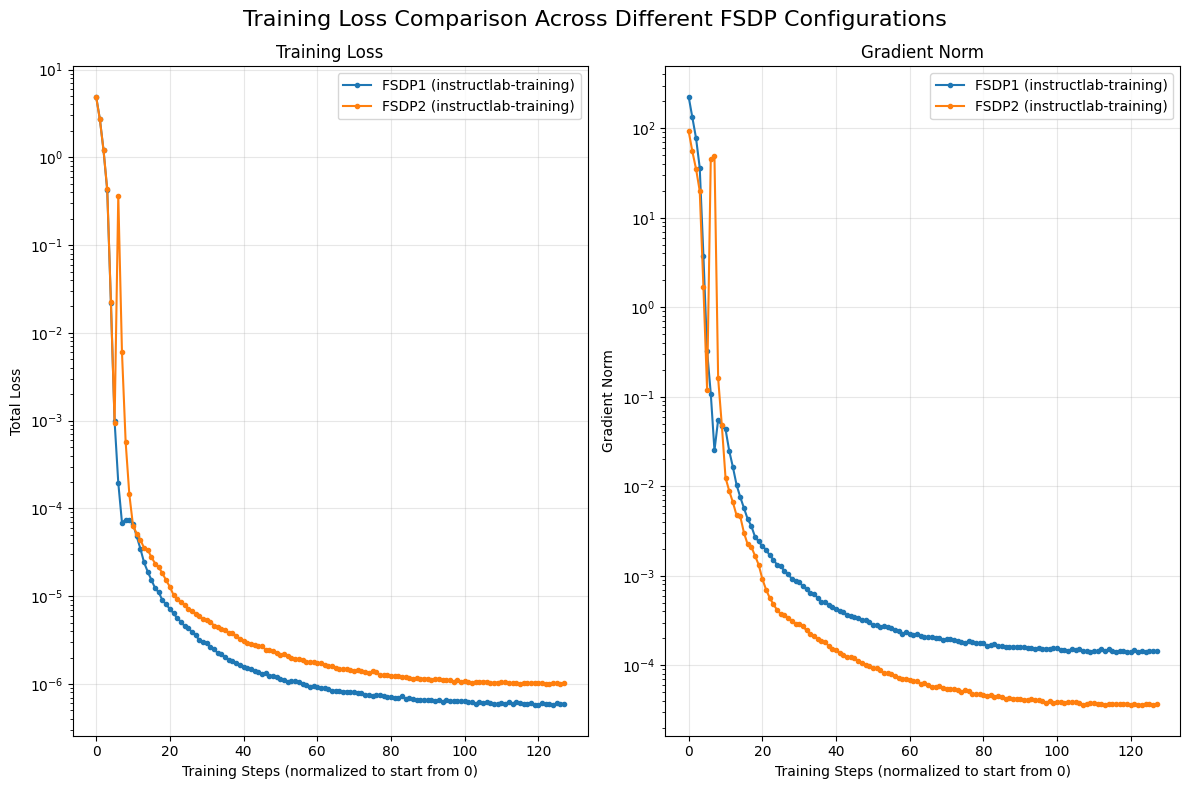


Dataset Statistics:
--------------------------------------------------
FSDP1 (instructlab-training) Loss: 128 valid values, first: 4.895228, last: 0.000001
FSDP1 (instructlab-training) GradNorm: 128 valid values, first: 224.632706, last: 0.000143
FSDP2 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000001
FSDP2 (instructlab-training) GradNorm: 128 valid values, first: 92.702759, last: 0.000037


In [7]:
# Example usage - you can rerun this with different paths after each training run
dataset_paths = [
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl",
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl"
]

dataset_names = [
    "FSDP1 (instructlab-training)",
    "FSDP2 (instructlab-training)"
]

plot_training_losses(
    dataset_paths=dataset_paths,
    dataset_names=dataset_names,
    title="Training Loss Comparison Across Different FSDP Configurations"
)

Generating train split: 130 examples [00:00, 23864.65 examples/s]


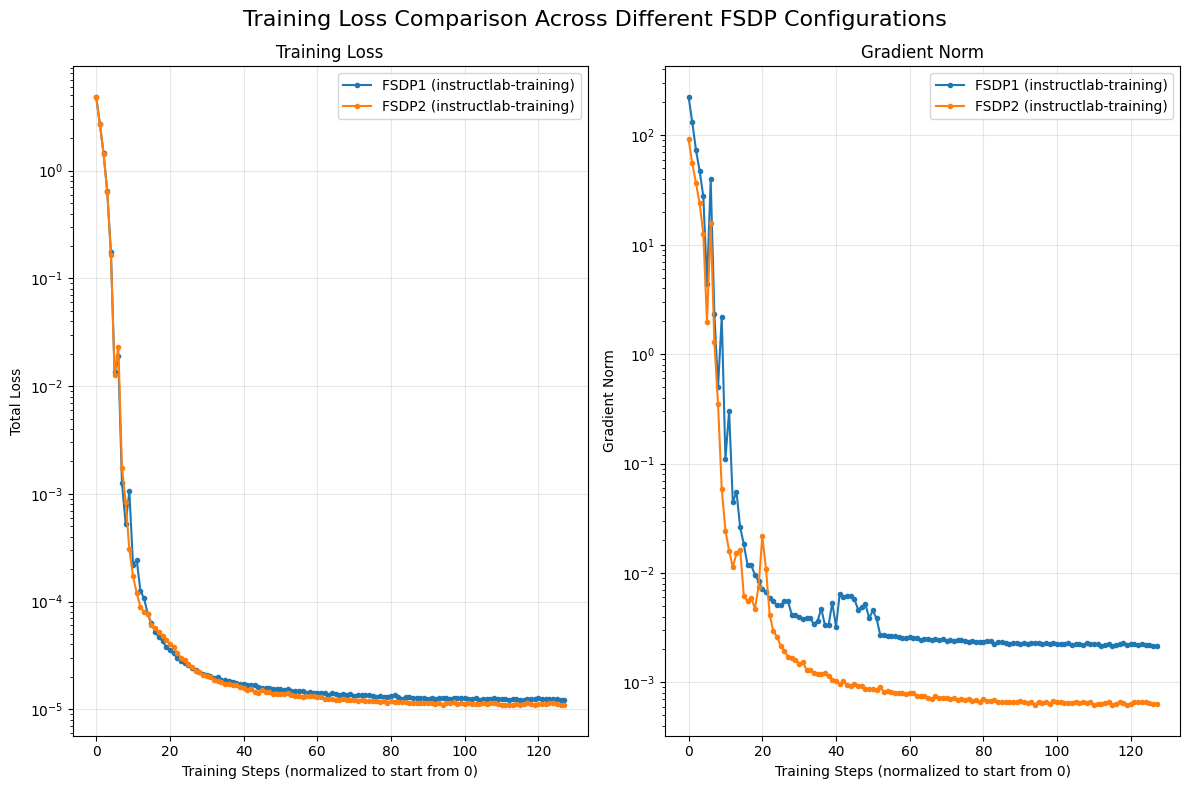


Dataset Statistics:
--------------------------------------------------
FSDP1 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000012
FSDP1 (instructlab-training) GradNorm: 128 valid values, first: 225.000000, last: 0.002167
FSDP2 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000011
FSDP2 (instructlab-training) GradNorm: 128 valid values, first: 92.500000, last: 0.000641


In [9]:
# Example usage - you can rerun this with different paths after each training run
dataset_paths = [
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl",
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl"
]

dataset_names = [
    "FSDP1 (instructlab-training)",
    "FSDP2 (instructlab-training)"
]

plot_training_losses(
    dataset_paths=dataset_paths,
    dataset_names=dataset_names,
    title="Training Loss Comparison Across Different FSDP Configurations"
)

Generating train split: 130 examples [00:00, 21529.63 examples/s]
Generating train split: 130 examples [00:00, 25339.69 examples/s]


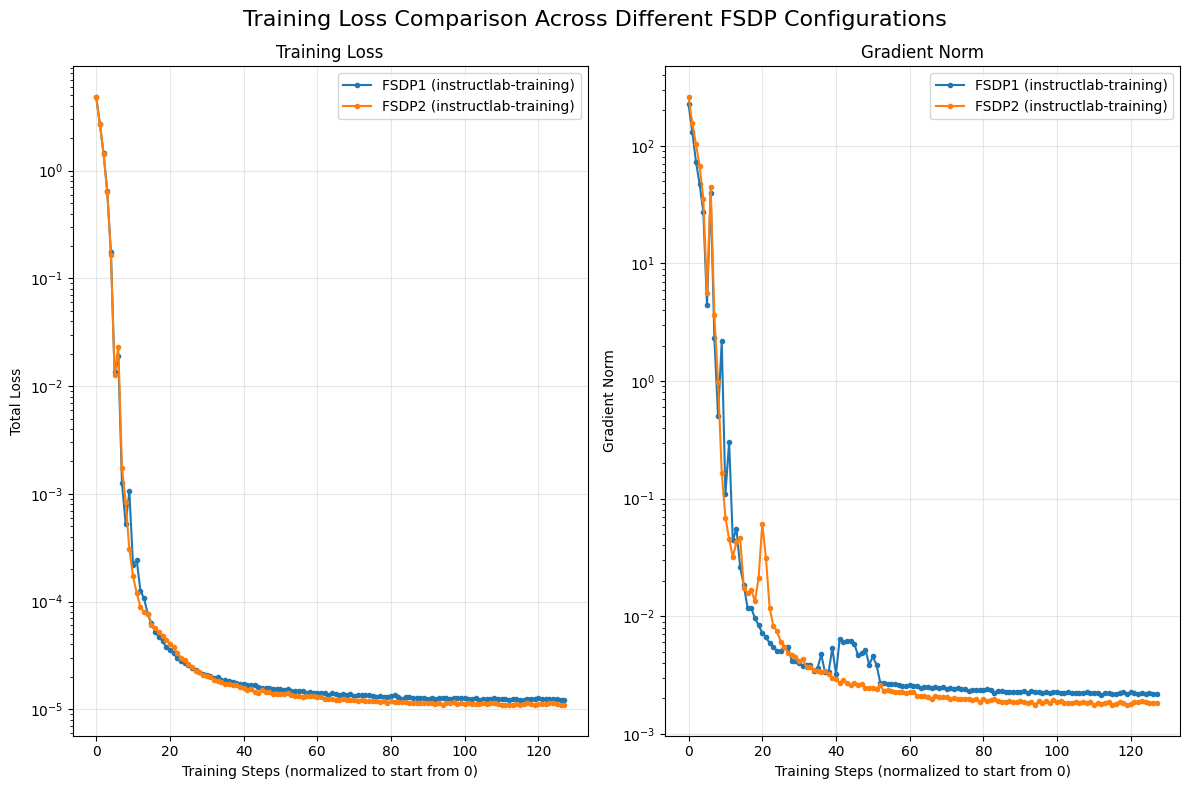


Dataset Statistics:
--------------------------------------------------
FSDP1 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000012
FSDP1 (instructlab-training) GradNorm: 128 valid values, first: 225.000000, last: 0.002167
FSDP2 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000011
FSDP2 (instructlab-training) GradNorm: 128 valid values, first: 261.629509, last: 0.001813


In [10]:

# Example usage - you can rerun this with different paths after each training run
dataset_paths = [
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl",
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl"
]

dataset_names = [
    "FSDP1 (instructlab-training)",
    "FSDP2 (instructlab-training)"
]

plot_training_losses(
    dataset_paths=dataset_paths,
    dataset_names=dataset_names,
    title="Training Loss Comparison Across Different FSDP Configurations"
)

Generating train split: 130 examples [00:00, 21172.66 examples/s]
Generating train split: 130 examples [00:00, 24722.72 examples/s]


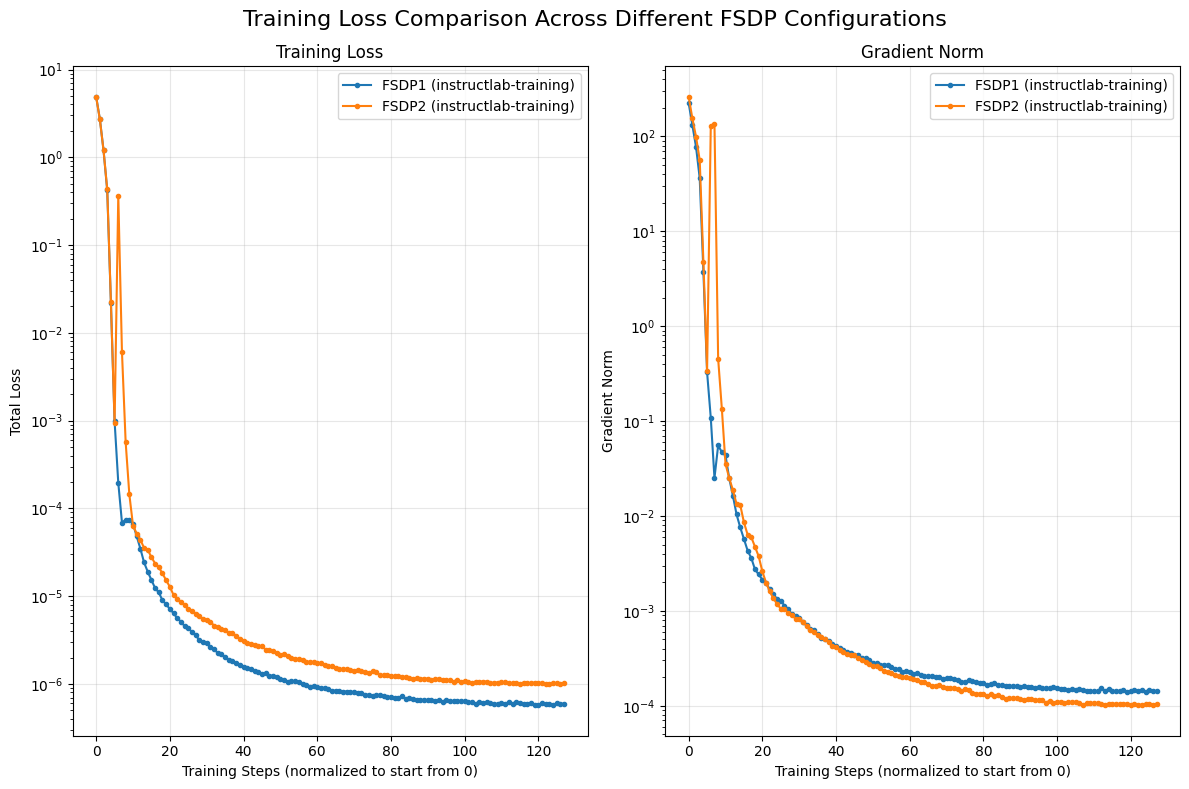


Dataset Statistics:
--------------------------------------------------
FSDP1 (instructlab-training) Loss: 128 valid values, first: 4.895228, last: 0.000001
FSDP1 (instructlab-training) GradNorm: 128 valid values, first: 224.632706, last: 0.000143
FSDP2 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000001
FSDP2 (instructlab-training) GradNorm: 128 valid values, first: 262.202997, last: 0.000105


In [15]:
# Example usage - you can rerun this with different paths after each training run
dataset_paths = [
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl",
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl"
]

dataset_names = [
    "FSDP1 (instructlab-training)",
    "FSDP2 (instructlab-training)"
]

plot_training_losses(
    dataset_paths=dataset_paths,
    dataset_names=dataset_names,
    title="Training Loss Comparison Across Different FSDP Configurations"
)

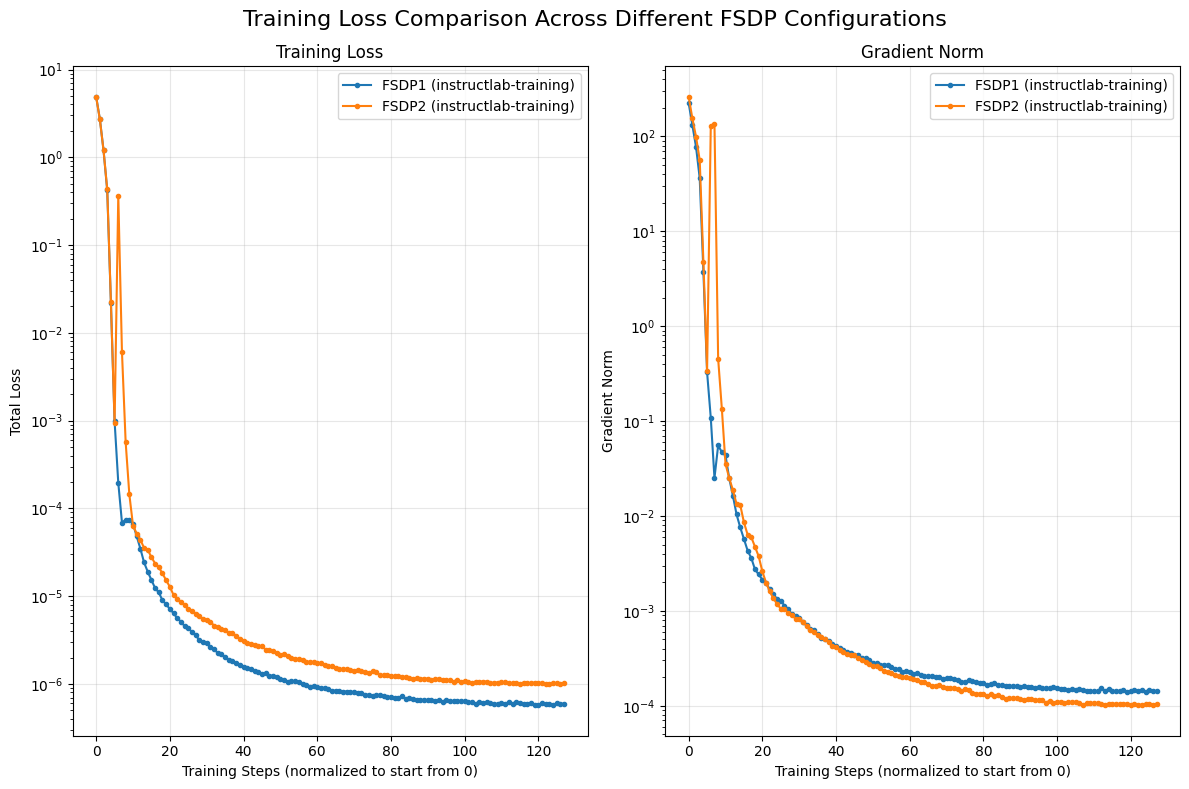


Dataset Statistics:
--------------------------------------------------
FSDP1 (instructlab-training) Loss: 128 valid values, first: 4.895228, last: 0.000001
FSDP1 (instructlab-training) GradNorm: 128 valid values, first: 224.632706, last: 0.000143
FSDP2 (instructlab-training) Loss: 128 valid values, first: 4.852941, last: 0.000001
FSDP2 (instructlab-training) GradNorm: 128 valid values, first: 262.202997, last: 0.000105


In [16]:
# Example usage - you can rerun this with different paths after each training run
dataset_paths = [
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp/training_params_and_metrics_global0.jsonl",
    "/mnt/nvme1n1/models/os-fsdp-debugging-fsdp2/training_params_and_metrics_global0.jsonl"
]

dataset_names = [
    "FSDP1 (instructlab-training)",
    "FSDP2 (instructlab-training)"
]

plot_training_losses(
    dataset_paths=dataset_paths,
    dataset_names=dataset_names,
    title="Training Loss Comparison Across Different FSDP Configurations"
)